In [ ]:
!nvidia-smi

Sun Jun 16 22:15:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 443 (delta 156), reused 138 (delta 129), pack-reused 233
Receiving objects: 100% (443/443), 12.86 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (228/228), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.3 MB/s eta 0:00:00


In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-qs0abmjh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-qs0abmjh
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install torch

In [ ]:
!pip install torchvision

In [ ]:
!pip install supervision==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: supervision
    Found existing installation: supervision 0.4.0
    Uninstalling supervision-0.4.0:
      Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.15 requires pillow>=9.0.0, but you have pillow 8.4.0 which is incompatible.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.12.0 which is incompatible.


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
%cd {HOME}
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

/content
cuda:0


In [ ]:
GROUNDING_DINO_CONFIG_PATH = '/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'
GROUNDING_DINO_CHECKPOINT_PATH = '/content/weights/groundingdino_swint_ogc.pth'

In [ ]:
from groundingdino.util.inference import Model
GD_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
import cv2
image_bgr = cv2.imread('/content/dino_chair.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_original = image_bgr

print(image_bgr.shape)

image_bgr = cv2.resize(image_bgr, (1024, 1024))
image_rgb = cv2.resize(image_rgb, (1024, 1024))
image_original = cv2.resize(image_original, (1024, 1024))

print(image_bgr.shape)



(6750, 4500, 3)
(1024, 1024, 3)


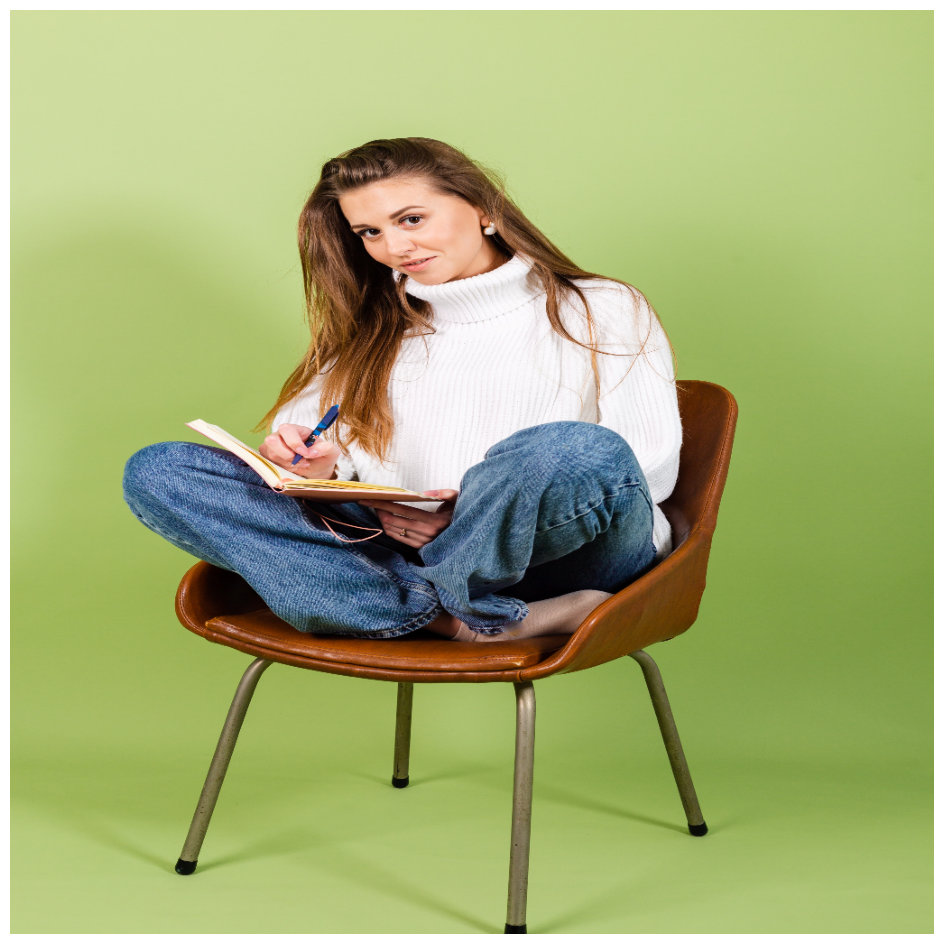

In [ ]:
import supervision as sv
sv.plot_image(image_bgr)

In [ ]:
# detect objects
CLASSES = ['person', 'chair']
detections = GD_model.predict_with_classes(
    image=image_rgb,
    classes=CLASSES,
    box_threshold=0.35,
    text_threshold=0.25
)

print(detections)

Detections(xyxy=array([[ 122.491425,  137.12613 ,  747.57825 ,  704.3611  ],
       [ 177.54526 ,  406.38562 ,  808.5497  , 1020.697   ],
       [ 120.916534,  132.6307  ,  810.2174  , 1017.16125 ]],
      dtype=float32), mask=None, confidence=array([0.39435694, 0.36406973, 0.36595544], dtype=float32), class_id=array([0, 1, 0]), tracker_id=None)


In [ ]:
print(detections.xyxy, type(detections.xyxy))
detected_boxes = detections.xyxy
class_id = detections.class_id
print(class_id)

[[ 122.491425  137.12613   747.57825   704.3611  ]
 [ 177.54526   406.38562   808.5497   1020.697   ]
 [ 120.916534  132.6307    810.2174   1017.16125 ]] <class 'numpy.ndarray'>
[0 1 0]


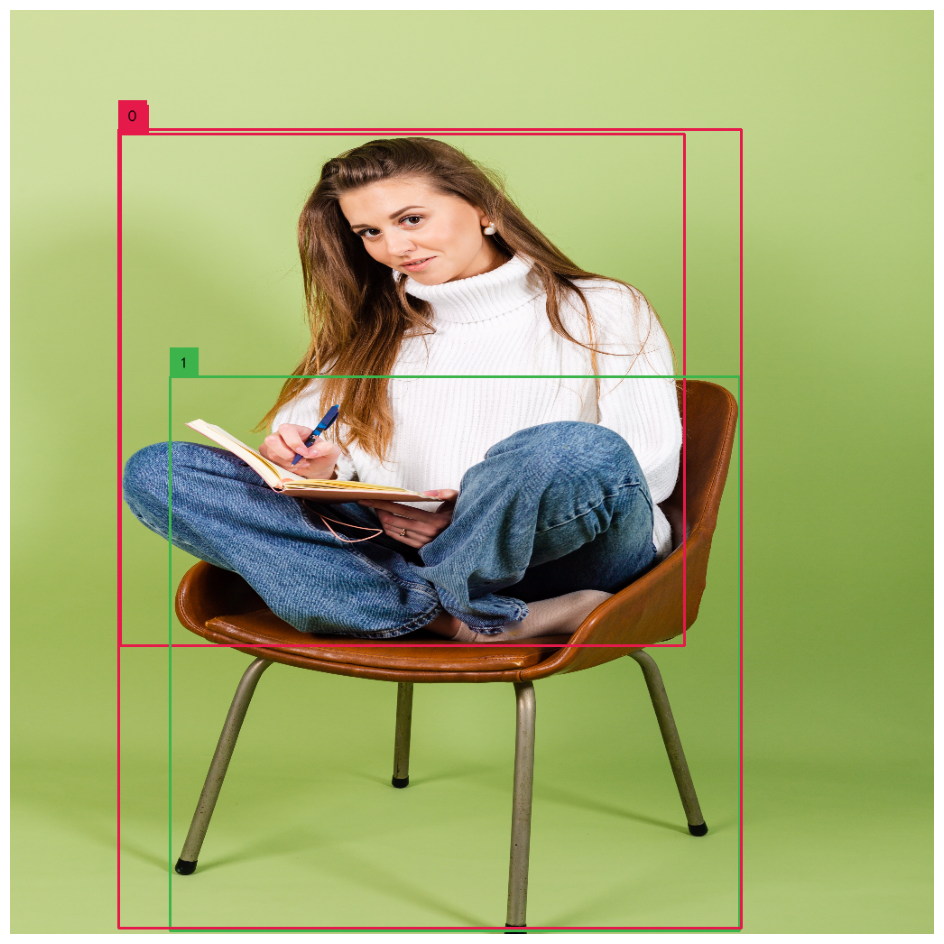

In [ ]:
import supervision as sv
box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=False, labels=[class_id])
sv.plot_image(annotated_frame)


In [ ]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = '/content/weights/sam_vit_h_4b8939.pth'

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

mask_predictor = SamPredictor(sam)


In [ ]:
import numpy as np
mask_annotator =  sv.MaskAnnotator(color=sv.Color.blue())
segmented_mask = []
counter = 0
for mybox in detected_boxes:
    mybox = np.array(mybox)
    print(mybox)


    mask_predictor.set_image(image_rgb)
    masks, scores, logits = mask_predictor.predict(
        point_coords=None,
        point_labels=None,
        box=mybox,
        multimask_output=False
    )

    segmented_mask.append(masks)
    print(len(masks), masks.shape)

# plot mask on image using supervision
    detections = sv.Detections(
        xyxy=sv.mask_to_xyxy(masks=masks),
        mask=masks
    )

    detections = detections[detections.area == np.max(detections.area)]
    print(CLASSES[class_id[counter]])

    annotated_image = box_annotator.annotate(scene=image_original.copy(), detections=detections, skip_label=False, labels=[CLASSES[class_id[counter]]])
    annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)
    image_original = annotated_image

    counter+=1

[122.491425 137.12613  747.57825  704.3611  ]
1 (1, 1024, 1024)
person
[ 177.54526  406.38562  808.5497  1020.697  ]
1 (1, 1024, 1024)
chair
[ 120.916534  132.6307    810.2174   1017.16125 ]
1 (1, 1024, 1024)
person


Plot image using Supervion

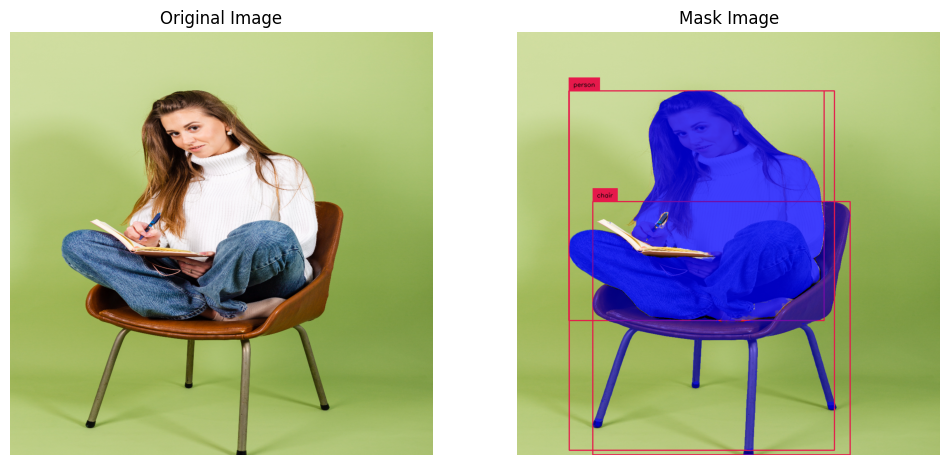

In [ ]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Mask Image']

)


In [ ]:
print(len(segmented_mask), type(segmented_mask[0]), segmented_mask[0].shape)

for i in range(len(segmented_mask)):

  segmented_mask[i] = segmented_mask[i].transpose(1,2,0)
  segmented_mask[i] = np.array(segmented_mask[i]*255).astype('uint8')
  segmented_mask[i]  = cv2.cvtColor(segmented_mask[i] , cv2.COLOR_GRAY2BGR)


print(segmented_mask[0].shape)

3 <class 'numpy.ndarray'> (1, 1024, 1024)
(1024, 1024, 3)


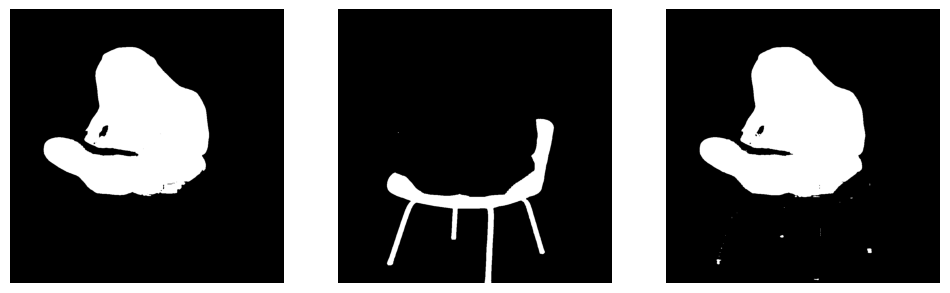

In [ ]:
sv.plot_images_grid(
    images=segmented_mask,
    grid_size=(1, len(segmented_mask)),

)

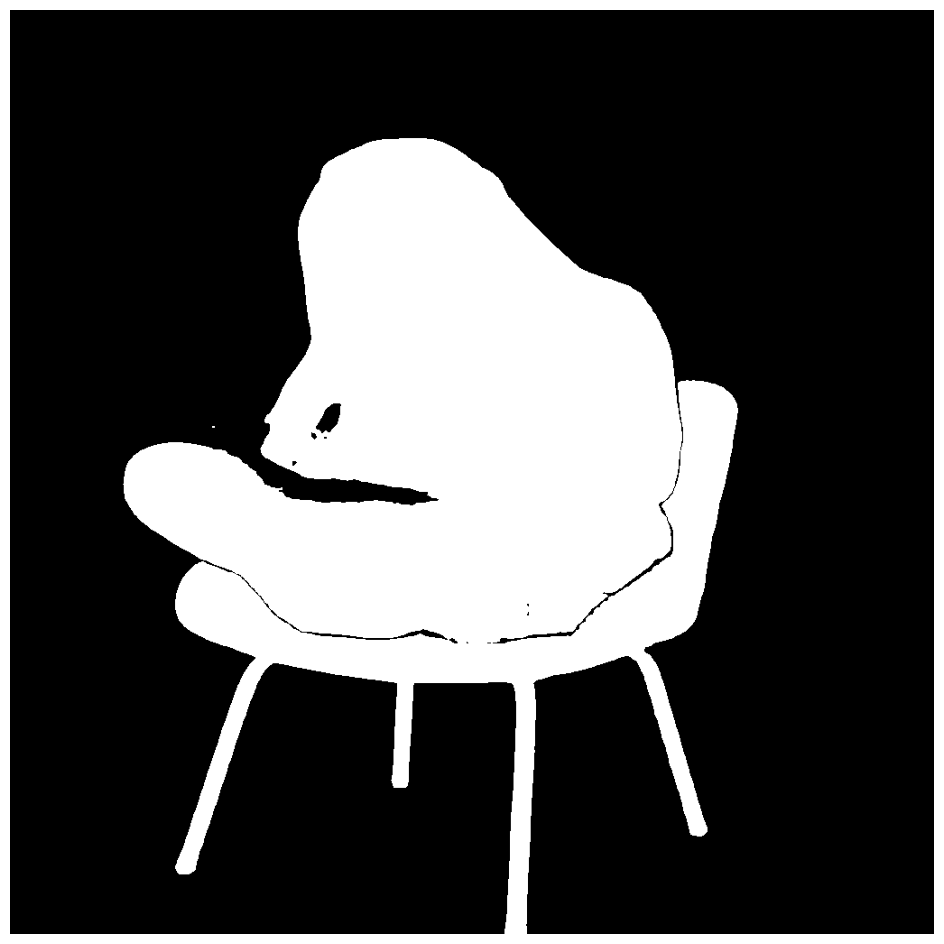

In [ ]:
segmented_image = segmented_mask[0]

for i in range(len(segmented_mask)):
  try:
    segmented_image = cv2.bitwise_or(segmented_image, segmented_mask[i+1])
  except:
    pass

sv.plot_image(segmented_image)

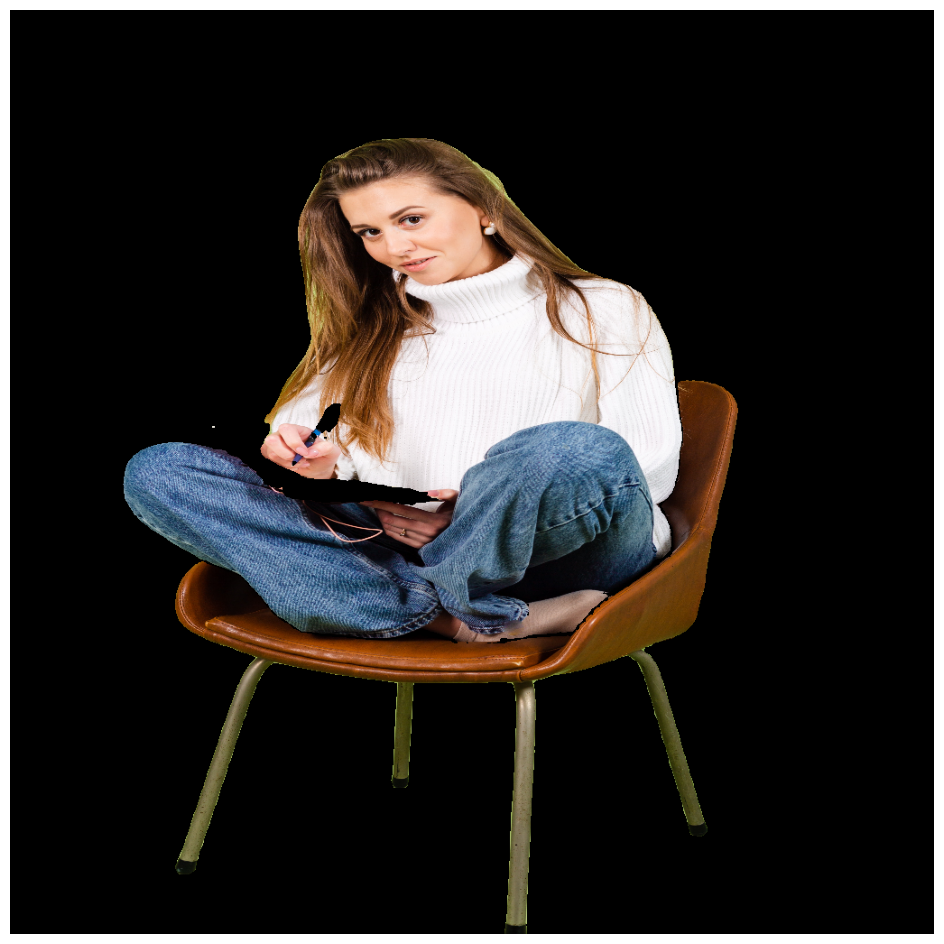

In [ ]:
segmented_image = cv2.bitwise_and(segmented_image, image_bgr)
sv.plot_image(segmented_image)

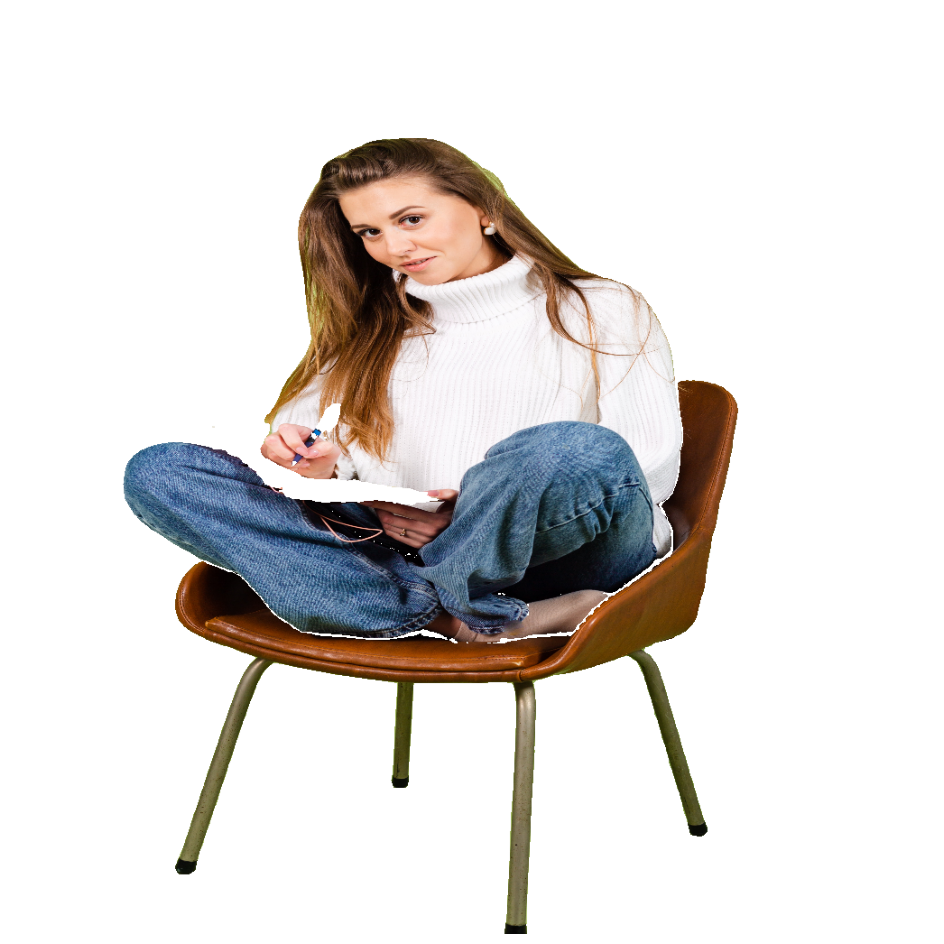

In [ ]:
segmented_image[np.where((segmented_image == [0, 0, 0]).all(axis=2))] = [255, 255, 255]
sv.plot_image(segmented_image)

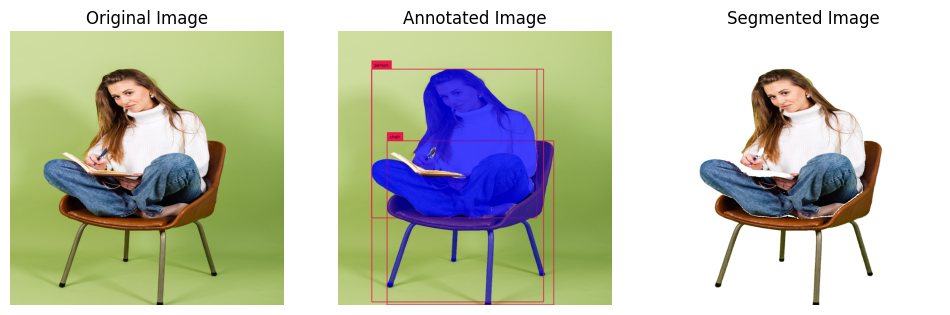

In [ ]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image, segmented_image],
    grid_size=(1, 3),
    titles=['Original Image', 'Annotated Image', 'Segmented Image'],
    #size=(48,48)

)